In [1]:
import numpy as np
import PIL
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
import matplotlib
from scipy.signal import find_peaks

(488, 648)


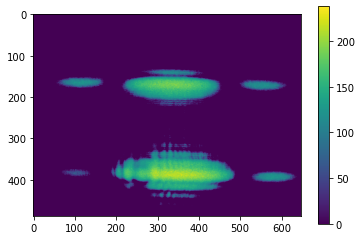

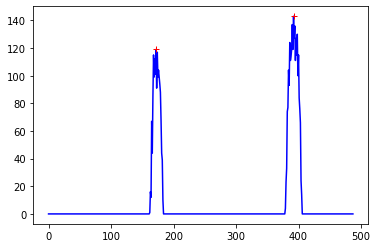

[172]
[392]
[220]
[72.72727273]
[4.54545455]


In [2]:
file1 = 'Length_Reference_Mandar0001.tif'
image1 = np.copy(np.array(PIL.Image.open(file1))[:, :, 0])
print(image1.shape)
plt.figure()
plt.imshow(image1)
plt.colorbar()
plt.show()
pks1, _ = find_peaks(image1[0:250, 580], height = 118)
pks2, _ = find_peaks(image1[250:, 580], height = 138)
plt.figure()
plt.plot(image1[:, 580], 'b')
plt.plot(pks1, image1[pks1, 580], 'r+')
plt.plot(pks2 + 250, image1[pks2 + 250, 580], 'r+')
plt.show()

print(pks1)
print(pks2 + 250)
print(250 + pks2 - pks1)
length = 1.6*(10**4)/(250 + pks2 - pks1) #in um
print(length)
error_length = 0.1*(10**4)/(250 + pks2 - pks1)
print(error_length)

(488, 648)


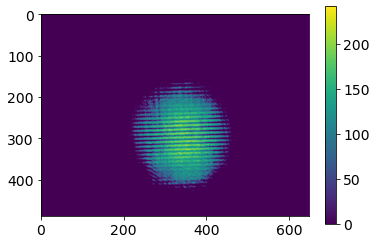

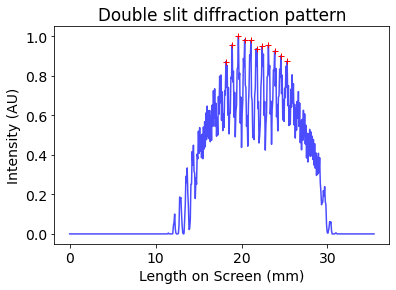

In [57]:
#file1 = 'Slits\Double_Slits\SlitB_Mandar0001.tif'
file1 = "Slits\Double_Slits\SlitB_Mandar0001.tif"
image1 = np.copy(np.array(PIL.Image.open(file1))[:, :, 0])
print(image1.shape)
plt.figure()
plt.imshow(image1)
plt.colorbar()
plt.show()

a = np.zeros(image1.shape[0])
ind1 = 200
ind2 = 400
for i in range (ind1, ind2):
    a = a + image1[:, i].astype(np.float32)/(ind2 - ind1)
a = (a - np.min(a))/(np.max(a) - np.min(a))

peaks, _ = find_peaks(a, prominence = 0.3, height = 0.5)
plt.figure()
matplotlib.rcParams.update({'font.size': 14})
plt.title('Double slit diffraction pattern')
plt.xlabel(r'Length on Screen (mm)')
plt.ylabel(r'Intensity (AU)')
plt.plot(np.arange(0, a.shape[0], 1)*length/1000, a, 'b', alpha = 0.7)
plt.plot(peaks*length/1000, a[peaks], 'r+')
#plt.savefig('D:\\Cornell\Cornell Semesters\Semester 2, Fall\'21\PHYS 6510 - Advanced Physics Lab\Experiment - Diffraction\Report\Figures\Double_SlitA.jpg')
plt.show()

# file1 = "Slits\Single_Slit\\Single_Slit_A_Mandar0001.tif"
# image1 = np.copy(np.array(PIL.Image.open(file1))[:, :, 0])
# print(image1.shape)
# plt.figure()
# plt.imshow(image1)
# plt.colorbar()
# plt.show()

# a = np.zeros(image1.shape[0])
# ind1 = 200
# ind2 = 400
# for i in range (ind1, ind2):
#     a = a + image1[:, i].astype(np.float32)/(ind2 - ind1)
# a = (a - np.min(a))/(np.max(a) - np.min(a))

# peaks, _ = find_peaks(a, prominence = 0.07, height = 0.3)
# plt.figure()
# matplotlib.rcParams.update({'font.size': 14})
# plt.title('Single slit diffraction pattern')
# plt.xlabel(r'Length on Screen (mm)')
# plt.ylabel(r'Intensity (AU)')
# plt.plot(np.arange(0, a.shape[0], 1)*length/1000, a, 'b', alpha = 0.7)
# plt.plot(peaks*length/1000, a[peaks], 'r+')
# plt.tight_layout()
# #plt.savefig('D:\\Cornell\Cornell Semesters\Semester 2, Fall\'21\PHYS 6510 - Advanced Physics Lab\Experiment - Diffraction\Report\Figures\\1slit.jpg')
# plt.show()

In [58]:
print(peaks)
#peaks = np.delete(peaks, [0,1,2])
#print(peaks)

[250 260 270 280 290 300 308 318 328 338 348]


[0.00909091 0.00909091 0.00909091 0.00909091 0.00909091 0.00909091
 0.00909091 0.00909091 0.00909091 0.00909091]


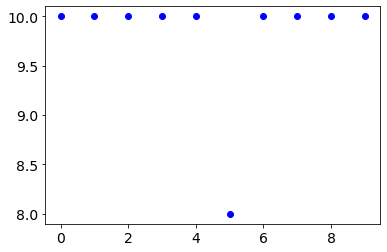

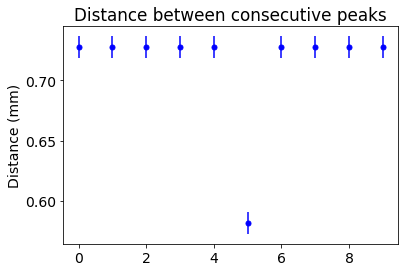

712.7272727272727
43.636363636363654


In [59]:
maxima_spacings = []
for i in range (peaks.shape[0] - 1):
    maxima_spacings.append((peaks[i+1] - peaks[i])*length)
print(2*error_length*np.ones(len(maxima_spacings))/1000)

plt.figure()
plt.plot(np.array(maxima_spacings)/length, 'bo')
plt.show()
plt.figure()
plt.title('Distance between consecutive peaks')
plt.ylabel('Distance (mm)')
plt.errorbar(x = np.arange(0, len(maxima_spacings), 1), y = np.array(maxima_spacings)/1000, \
             yerr = 2*error_length*np.ones(len(maxima_spacings))/1000, fmt = 'bo', ms = 5)
#plt.savefig('D:\\Cornell\Cornell Semesters\Semester 2, Fall\'21\PHYS 6510 - Advanced Physics Lab\Experiment - Diffraction\Report\Figures\Single_SlitA_distances.jpg')
plt.show()
print(np.mean(maxima_spacings))
print(np.std(maxima_spacings))

(488, 648)


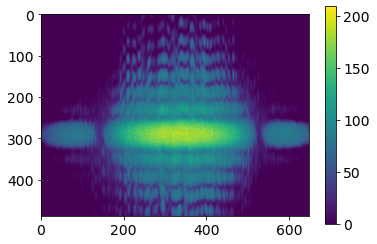

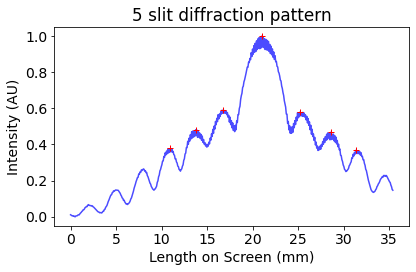

In [37]:
file1 = "Slits\Single_Slit\\Single_Slit_A_Mandar0001.tif"
image1 = np.copy(np.array(PIL.Image.open(file1))[:, :, 0])
print(image1.shape)
plt.figure()
plt.imshow(image1)
plt.colorbar()
plt.show()

a = np.zeros(image1.shape[0])
ind1 = 200
ind2 = 400
for i in range (ind1, ind2):
    a = a + image1[:, i].astype(np.float32)/(ind2 - ind1)
a = (a - np.min(a))/(np.max(a) - np.min(a))

peaks, _ = find_peaks(a, prominence = 0.07, height = 0.3)
plt.figure()
matplotlib.rcParams.update({'font.size': 14})
plt.title('5 slit diffraction pattern')
plt.xlabel(r'Length on Screen (mm)')
plt.ylabel(r'Intensity (AU)')
plt.plot(np.arange(0, a.shape[0], 1)*length/1000, a, 'b', alpha = 0.7)
plt.plot(peaks*length/1000, a[peaks], 'r+')
plt.tight_layout()
#plt.savefig('D:\\Cornell\Cornell Semesters\Semester 2, Fall\'21\PHYS 6510 - Advanced Physics Lab\Experiment - Diffraction\Report\Figures\\1slit.jpg')
plt.show()